In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler

# Create Sample Data (Student Test Scores)
np.random.seed(42)  # For reproducibility
n_students = 200
n_tests = 5  # Math, Reading, Vocabulary, Science, Writing
n_factors = 2  # Number of latent factors

# Create the factors (latent skills)
factors = np.random.normal(size=(n_students, n_factors))

# Create the loadings (how each factor influences each test)
loadings = np.array([[0.9, 0.1],  # Math
                     [0.1, 0.9],  # Reading
                     [0.1, 0.8],  # Vocabulary
                     [0.8, 0.2],  # Science
                     [0.5, 0.6]])  # Writing

# Create the test scores based on the factors and loadings - Very Low Noise
student_data = factors @ loadings.T + np.random.normal(size=(n_students, n_tests), scale=0.05)

df = pd.DataFrame(student_data, columns=['Math', 'Reading', 'Vocabulary', 'Science', 'Writing'])

# Standardize the Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Apply Factor Analysis
fa = FactorAnalysis(n_components=n_factors, rotation='varimax')  # Use varimax rotation
factors_extracted = fa.fit_transform(scaled_data)

# Create a DataFrame with the Extracted Factors
df_factors = pd.DataFrame(data=factors_extracted, columns=['Factor 1', 'Factor 2'])

# Interpreting the Factors
loadings_matrix = fa.components_.T  # Loadings matrix
df_loadings = pd.DataFrame(loadings_matrix, columns=['Factor 1', 'Factor 2'], index=df.columns)
print("\nFactor Loadings:\n", df_loadings)

# Calculate Uniquenesses (Specific Variances)
covariance_matrix = np.cov(scaled_data, rowvar=False)
reconstructed_covariance = factors_extracted @ fa.components_ + fa.noise_variance_
uniquenesses = np.diag(covariance_matrix) - np.diag(reconstructed_covariance)

print("\nUniquenesses:\n", uniquenesses)  # Check uniquenesses


Factor Loadings:
             Factor 1  Factor 2
Math       -0.995174 -0.084639
Reading    -0.119418 -0.990847
Vocabulary -0.126455 -0.989992
Science    -0.974718 -0.214870
Writing    -0.648342 -0.758797

Uniquenesses:
 [ 0.5717687  -0.57348434  1.38040265 -0.77765649  0.84705533]


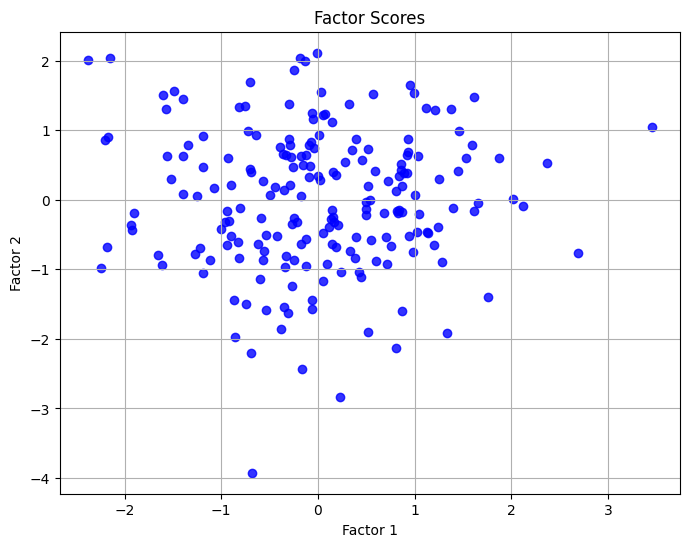

In [2]:
# Using the Extracted Factors

# Example: Accessing the factor scores
X_factors = df_factors.values  # Get the factor scores as a NumPy array

# Example: Visualizing Factor Scores
plt.figure(figsize=(8, 6))
plt.scatter(X_factors[:, 0], X_factors[:, 1], c='blue', alpha=0.8)
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.title('Factor Scores')
plt.grid(True)
plt.show()

In [3]:
# Example: Reconstructing the data (Correctly for Factor Analysis)
loadings = fa.components_  # Correct: No transpose needed here
X_reconstructed_scaled = factors_extracted @ loadings + fa.mean_
X_reconstructed = scaler.inverse_transform(X_reconstructed_scaled)

# Compare the original data and the reconstructed data (optional)
print("\nOriginal Data (First 5 rows):\n", df.head())
print("\nReconstructed Data (First 5 rows):\n", pd.DataFrame(X_reconstructed, columns=df.columns).head())


Original Data (First 5 rows):
        Math   Reading  Vocabulary   Science   Writing
0  0.353495 -0.104735   -0.060678  0.372067  0.142895
1  0.766365  1.382115    1.276074  0.828772  1.263384
2 -0.198571 -0.290371   -0.287431 -0.170266 -0.240943
3  1.460611  0.926170    0.777653  1.475822  1.253443
4 -0.265234  0.529124    0.374652 -0.218489  0.123068

Reconstructed Data (First 5 rows):
        Math   Reading  Vocabulary   Science   Writing
0  0.381620 -0.086978   -0.070984  0.329475  0.144424
1  0.761812  1.404142    1.266641  0.847170  1.240838
2 -0.177680 -0.298467   -0.264022 -0.190189 -0.257066
3  1.485388  0.883281    0.805023  1.422502  1.274680
4 -0.290524  0.457911    0.412487 -0.197512  0.150302
